import pandas as pd
!mkdir /root/.kaggle/
!pip install kaggle
import json

#Important Note: complete this with your own key - after running this for the first time remmember to **remove** your API_KEY
api_token = {"username":"amyuval","key":"1c309b85bf5a7e1c79a431e672976a28"}

# creating kaggle.json file with the personal API-Key details
# You can also put this file on your Google Drive
with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 ~/.kaggle/kaggle.json# Homework Assignment 4
### The Art of Analyzing Big Data - The Data Scientist’s Toolbox 

## Reddit Networks
Using the [Reddit networks dataset](http://dynamics.cs.washington.edu/nobackup/reddit/) select the subreddit of your favorite  TV show. Using the data of the selected subreddit, 
answer the following questions:

In [2]:
!mkdir ./datasets
!mkdir ./datasets/seinfeld
!wget http://dynamics.cs.washington.edu/nobackup/reddit/RedditWritesSeinfeld.tar.gz -O          ./datasets/seinfeld/sein.tar.gz
!tar -xf ./datasets/seinfeld/sein.tar.gz -C ./datasets/seinfeld


mkdir: cannot create directory ‘./datasets’: File exists
mkdir: cannot create directory ‘./datasets/seinfeld’: File exists
--2022-03-16 11:34:42--  http://dynamics.cs.washington.edu/nobackup/reddit/RedditWritesSeinfeld.tar.gz
Resolving dynamics.cs.washington.edu (dynamics.cs.washington.edu)... 128.208.3.120, 140.142.5.13, 140.142.5.5, ...
Connecting to dynamics.cs.washington.edu (dynamics.cs.washington.edu)|128.208.3.120|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2672007 (2.5M) [application/x-gzip]
Saving to: ‘./datasets/seinfeld/sein.tar.gz’

./datasets/seinfeld 100%[===================>]   2.55M  1.63MB/s    in 1.6s    

2022-03-16 11:34:44 (1.63 MB/s) - ‘./datasets/seinfeld/sein.tar.gz’ saved [2672007/2672007]



In [2]:
import turicreate as tc
g = tc.load_sgraph('./datasets/seinfeld/RedditWritesSeinfeld.2014-09-05.2016-10-31.sgraph')
g.summary()

{'num_edges': 4867, 'num_vertices': 3194}

**Task 1:** Calculate and visualize the degree distribution  of the vertices  in the network (15pt)

In [3]:
m = tc.degree_counting.create(g)
g2 = m['graph']
g2


SGraph({'num_edges': 4867, 'num_vertices': 3194})
Vertex Fields:['__id', 'in_degree', 'out_degree', 'total_degree']
Edge Fields:['__src_id', '__dst_id']

In [5]:
sf = g2.get_vertices()
sf

__id,in_degree,out_degree,total_degree
Racing2733,1,1,2
StolenLampy,0,0,0
RanzhaVEmodrach,0,0,0
MichaelGaryScotch,1,0,1
readmeanything,1,1,2
TroperCase,0,1,1
zettaswag,1,1,2
Mrquizmo,0,0,0
RosaPrksCalldShotgun,0,1,1
One_True_Statement,1,0,1


In [8]:
hist = tc.visualization.histogram(sf['total_degree'], 'Total Degree', 'Count', 'Degree distribution')
hist

Materializing SArray

**Task 2:** Create a subgraph of the top-40 users according to a selected centrality algorithm. Draw the subgraph using circlular layout (15pt)

In [10]:
pr = tc.pagerank.create(g)

Counting out degree

Done counting out degree

+-----------+-----------------------+

| Iteration | L1 change in pagerank |

+-----------+-----------------------+

| 1         | 2570.39               |

| 2         | 869.568               |

| 3         | 360.124               |

| 4         | 188.704               |

| 5         | 109.677               |

| 6         | 72.255                |

| 7         | 50.9706               |

| 8         | 37.0627               |

| 9         | 27.8954               |

| 10        | 21.3122               |

| 11        | 16.4556               |

| 12        | 12.8324               |

| 13        | 10.0673               |

| 14        | 7.94408               |

| 15        | 6.30257               |

| 16        | 5.02239               |

| 17        | 4.02035               |

| 18        | 3.23194               |

| 19        | 2.6088                |

| 20        | 2.11408               |

+-----------+-----------------------+

In [13]:
sf = pr['pagerank'].sort('pagerank', ascending = False)[:40]
sf

__id,pagerank,delta
Awesomeautism,24.840658987578045,0.018413534080320204
SoupIsNotAMeal,15.70915005593303,0.014113569720132446
exitpursuedbybear,8.465383498855681,0.0059321138337224966
GravityTortoise,7.9273896119144736,0.006839013051009424
Mardak5150,7.71949648357076,0.006672682355094217
vaclavhavelsmustache,6.596607447897441,0.004419878733142646
pohatu771,6.353737603951408,0.007112154344955712
fine-rusty-knife,5.457961825467558,0.00713921267501938
Iron_Chic,5.453713238218745,0.0038782621625204072
RennisDeynolds,5.446738652925882,0.0054401902494074506


In [15]:
import networkx as nx
def sgraph2nxgraph(sgraph, is_directed=True, add_vertices_attributes=True, add_edges_attributes=True):
    if is_directed:
        nx_g = nx.DiGraph()
    else:
        nx_g = nx.Graph()
    if add_vertices_attributes:
        vertices = [(r['__id'] , r) for r in sgraph.vertices]
    else:
        vertices = list(sgraph.get_vertices()['__id'])

    if add_edges_attributes:
        edges = [(r['__src_id'], r['__dst_id'], r) for r in sgraph.edges]
    else:
        edges = [(e['__src_id'], e['__dst_id']) for e in sgraph.get_edges()]
    nx_g.add_nodes_from(vertices)
    nx_g.add_edges_from(edges)
    return nx_g


ng = sgraph2nxgraph(g)
print("Networkx: %s" % nx.info(ng))

Networkx: Name: 
Type: DiGraph
Number of nodes: 3194
Number of edges: 4867
Average in degree:   1.5238
Average out degree:   1.5238


In [21]:
sg = ng.subgraph(sf['__id'])
print("Networkx: %s" % nx.info(sg))

Networkx: Name: 
Type: DiGraph
Number of nodes: 40
Number of edges: 101
Average in degree:   2.5250
Average out degree:   2.5250


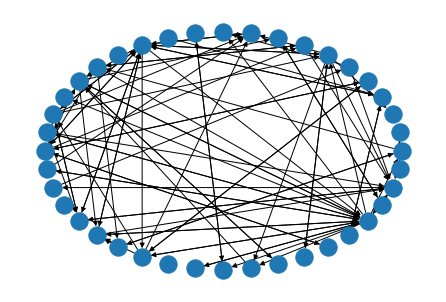

In [22]:
nx.draw_circular(sg)

**Task 3:** Calculate the PageRank, triangles, and average shortest path of each vertex in the graph (15pt)

**Task 4:** Use Cytoscape and Gephi to visualize the network, where each vertex size is correlates to its degree (15pt)

**Task 5:** Write a function that for a given vertex creates a subgraph of the selected vertex and all the vertex's in/out friends (10pt).
Draw the subgraph (5pt). Calculate the number of verticies and edges in the subgraph (5pt)

**Task 6:** Find the top-10 most centeral players at [The Free Internet Chess Sever](http://dynamics.cs.washington.edu/nobackup/chess/fcis.tar.gz) (15 pt). Visualize part of the network (5pt).
    
**Note:** The network has 429,747,476 edges

**Task 7:** Use Cytoscape to draw the Lord of the Rings Couples network (see Lecture 2).
Fill the network's vertices in a different color according to the gender.
Select each vertex shape to be according to the vertex race. (7pt)

### Additional Questions for Practice

**Task 1:** Visualize the distribution of the network's strongly and weakly connected components.

**Task 2:** Using Cytoscape, visualize the network's maximal strongly connected component (or part of it)

**Task 3:** Draw a subgraph of all the vertices that have at least one reciprocal link, i.e., all the vertices where there is at least one vertex _u_ so that both links (u,v) and (v,u) exists

**Task 4:** Split the network into communities, and find the second most central vertex in each community
    

**Task 5:** Find the top-10 most central players at [The Free Internet Chess Server](http://dynamics.cs.washington.edu/nobackup/chess/fcis.tar.gz).
    Visualize part of the network.
    
**Note:** The network has 429,747,476 edges